In [1]:
%load_ext autoreload
%autoreload 2

here the objective is to fit the logit graph model to multiple different graph domains and then visualize the original vs fitted graphs

In [2]:

import sys
import os
sys.path.append('../..')

#Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils
import src.model_selection as model_selection
import src.gic as gic
import src.param_estimator as pe
import src.graph as graph
import src.model_selection as ms

# usual imports
import matplotlib.pyplot as plt
import pickle
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx
from numpy import errstate

from IPython.display import display
from pyvis.network import Network
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
FOLDER_OUTPUT = f'runs/fitted_graphs_comparison_human_scale33'
out_files = os.listdir(FOLDER_OUTPUT)
out_files = sorted(out_files, key=lambda x: os.path.getctime(os.path.join(FOLDER_OUTPUT, x)), reverse=True)

out_files

['comparators_802844_repeated10_scale33.pkl',
 'comparators_647858_repeated10_scale33.pkl',
 'comparators_992774_repeated10_scale33.pkl',
 'comparators_174437_repeated10_scale33.pkl',
 'comparators_111211_repeated10_scale33.pkl',
 'comparators_765864_repeated10_scale33.pkl',
 'comparators_151930_repeated10_scale33.pkl',
 'comparators_348545_repeated10_scale33.pkl',
 'comparators_107422_repeated10_scale33.pkl',
 'comparators_193845_repeated10_scale33.pkl',
 'comparators_135932_repeated10_scale33.pkl',
 'comparators_177746_repeated10_scale33.pkl',
 'comparators_158540_repeated10_scale33.pkl',
 'comparators_519647_repeated10_scale33.pkl',
 'comparators_208327_repeated10_scale33.pkl',
 'comparators_833148_repeated10_scale33.pkl',
 'comparators_197651_repeated10_scale33.pkl',
 'comparators_156334_repeated10_scale33.pkl',
 'comparators_193239_repeated10_scale33.pkl',
 'comparators_202719_repeated10_scale33.pkl',
 'comparators_859671_repeated10_scale33.pkl',
 'comparators_213522_repeated10_sc

In [4]:
import pickle
#pick first id from out_files
id = out_files[1]
print(id)

with open(f'{FOLDER_OUTPUT}/{id}', 'rb') as f:
    comparators = pickle.load(f)


comparators_647858_repeated10_scale33.pkl


In [5]:
len(comparators)

1063

In [6]:
dfs = []
for i in range(len(comparators)):
    dfs.append(comparators[i].summary_df)

In [7]:
dfs[1]

graph_filename     model  gic_value               param  \
0  197348_repeated10_scale33.graphml  Original        NaN                 N/A   
1  197348_repeated10_scale33.graphml        LG   1.101836  d=1, sigma=-4.3845   
2  197348_repeated10_scale33.graphml        ER   0.301911                 0.2   
3  197348_repeated10_scale33.graphml        BA   0.497421                 5.0   
4  197348_repeated10_scale33.graphml        WS   1.414701           20.157778   
5  197348_repeated10_scale33.graphml       GRG   3.526152                 1.0   

   fit_success  nodes  edges   density  avg_clustering  avg_path_length  \
0         True     83    903  0.265354        0.730255         2.041554   
1         True     83    923  0.271231        0.275565         1.730532   
2         True     83    692  0.203350        0.215235         1.819277   
3         True     83    390  0.114605        0.238543         2.149868   
4         True     83    913  0.268293        0.262879         1.733470   
5         True     83   3303  0.970614        0.973958         1.029386   

   diameter  assortativity  num_components  largest_component_size  
0         5      -0.004549               2                      82  
1         3      -0.050778               1                      83  
2         3      -0.102868               1                      83  
3         4      -0.125366               1                      83  
4         3      -0.028577               1                      83  
5         2      -0.055195               1                      83

In [8]:
pd.concat(dfs)

graph_filename     model  gic_value  \
0   125525_repeated10_scale33.graphml  Original        NaN   
1   125525_repeated10_scale33.graphml        LG   1.029965   
2   125525_repeated10_scale33.graphml        ER   0.660869   
3   125525_repeated10_scale33.graphml        BA   0.812809   
4   125525_repeated10_scale33.graphml        WS   1.281244   
..                                ...       ...        ...   
1   647858_repeated10_scale33.graphml        LG   2.585324   
2   647858_repeated10_scale33.graphml        ER   0.460059   
3   647858_repeated10_scale33.graphml        BA   0.683470   
4   647858_repeated10_scale33.graphml        WS   1.311278   
5   647858_repeated10_scale33.graphml       GRG   2.920256   

                 param  fit_success  nodes  edges   density  avg_clustering  \
0                  N/A         True     83    841  0.247135        0.665793   
1   d=0, sigma=-5.2371         True     83    876  0.257420        0.254596   
2                  0.2         True     83    654  0.192183        0.195303   
3                  5.0         True     83    390  0.114605        0.227678   
4                 20.2         True     83    830  0.243902        0.238784   
..                 ...          ...    ...    ...       ...             ...   
1   d=0, sigma=-5.1450         True     83    879  0.258301        0.270943   
2                  0.2         True     83    644  0.189245        0.189872   
3                  5.0         True     83    390  0.114605        0.219145   
4            20.031111         True     83    830  0.243902        0.238854   
5                  1.0         True     83   3326  0.977373        0.979920   

    avg_path_length  diameter  assortativity  num_components  \
0          1.829322         4      -0.085438              10   
1          1.743168         3      -0.058240               1   
2          1.854540         3      -0.071488               1   
3          2.142521         3      -0.103222               1   
4          1.758742         3      -0.077436               1   
..              ...       ...            ...             ...   
1          1.746400         3      -0.021626               1   
2          1.858948         3       0.003757               1   
3          2.154863         3      -0.140947               1   
4          1.762562         3      -0.033166               1   
5          1.022627         2      -0.056175               1   

    largest_component_size  
0                       74  
1                       83  
2                       83  
3                       83  
4                       83  
..                     ...  
1                       83  
2                       83  
3                       83  
4                       83  
5                       83  

[6378 rows x 14 columns]

In [9]:
# Create a DataFrame with GIC values for each model and graph
gic_df = pd.DataFrame()

for df in dfs:
    graph_name = df['graph_filename'].iloc[0]
    # Get GIC values for each model (excluding Original which has NaN)
    model_gics = df[df['model'] != 'Original'].set_index('model')['gic_value']
    gic_df[graph_name] = model_gics

# Transpose so graphs are rows and models are columns
gic_df = gic_df.T
gic_df

/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_9443/3525529518.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gic_df[graph_name] = model_gics
/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_9443/3525529518.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gic_df[graph_name] = model_gics
/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_9443/3525529518.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

model                                    LG        ER        BA        WS  \
125525_repeated10_scale33.graphml  1.029965  0.660869  0.812809  1.281244   
197348_repeated10_scale33.graphml  1.101836  0.301911  0.497421  1.414701   
180432_repeated10_scale33.graphml  0.899130  0.568584  0.838183  1.270131   
169444_repeated10_scale33.graphml  0.875837  0.492052  0.662431  1.379907   
713239_repeated10_scale33.graphml  0.579910  0.713789  1.018954  1.002579   
...                                     ...       ...       ...       ...   
765864_repeated10_scale33.graphml  0.930251  0.468974  0.677343  1.197500   
111211_repeated10_scale33.graphml  0.816719  0.471581  0.580058  1.336815   
174437_repeated10_scale33.graphml  1.002958  0.648132  0.761493  1.296976   
992774_repeated10_scale33.graphml  3.077844  0.631199  0.879854  1.290972   
647858_repeated10_scale33.graphml  2.585324  0.460059  0.683470  1.311278   

model                                   GRG  
125525_repeated10_scale33.graphml  3.233714  
197348_repeated10_scale33.graphml  3.526152  
180432_repeated10_scale33.graphml  2.775582  
169444_repeated10_scale33.graphml  2.968525  
713239_repeated10_scale33.graphml  4.961633  
...                                     ...  
765864_repeated10_scale33.graphml  3.131131  
111211_repeated10_scale33.graphml  3.255519  
174437_repeated10_scale33.graphml  2.237110  
992774_repeated10_scale33.graphml  2.573608  
647858_repeated10_scale33.graphml  2.920256  

[1063 rows x 5 columns]

In [10]:
# Create a dictionary to store rankings for each graph
rankings = {}

# Go through each df in dfs
for df in dfs:
    graph_name = df['graph_filename'].iloc[0]  # Get graph filename
    
    # Sort models by GIC value (excluding 'Original' which has NaN GIC)
    model_ranks = df[df['model'] != 'Original'].sort_values('gic_value')['model'].tolist()
    
    # Create rankings dictionary for this graph (1 is best since lowest GIC is best)
    rankings[graph_name] = {
        model: rank+1 for rank, model in enumerate(model_ranks)
    }
    
    # Add nodes and edges from Original model
    original_row = df[df['model'] == 'Original'].iloc[0]
    rankings[graph_name]['nodes'] = original_row['nodes']
    rankings[graph_name]['edges'] = original_row['edges']

# Get unique models (excluding 'Original')
models = sorted(list(set([model for df in dfs for model in df['model'].unique() if model != 'Original'])))

# Create DataFrame with rankings
ranking_df = pd.DataFrame(rankings).T

# Ensure all models are present as columns
for model in models:
    if model not in ranking_df.columns:
        ranking_df[model] = np.nan

# Keep only the model columns in a consistent order, plus nodes and edges
ranking_df = ranking_df[models + ['nodes', 'edges']]

print("Rankings by GIC value (lower is better):")
display(ranking_df)


Rankings by GIC value (lower is better):


BA  ER  GRG  LG  WS  nodes  edges
125525_repeated10_scale33.graphml   2   1    5   3   4     83    841
197348_repeated10_scale33.graphml   2   1    5   3   4     83    903
180432_repeated10_scale33.graphml   2   1    5   3   4     83    800
169444_repeated10_scale33.graphml   2   1    5   3   4     83    752
713239_repeated10_scale33.graphml   4   2    5   1   3     83    525
...                                ..  ..  ...  ..  ..    ...    ...
765864_repeated10_scale33.graphml   2   1    5   3   4     83    688
111211_repeated10_scale33.graphml   2   1    5   3   4     83    797
174437_repeated10_scale33.graphml   2   1    5   3   4     83    796
992774_repeated10_scale33.graphml   2   1    4   5   3     83    780
647858_repeated10_scale33.graphml   2   1    5   4   3     83    847

[1063 rows x 7 columns]

In [11]:
ranking_df.mean(axis=0)

BA         2.333960
ER         1.316087
GRG        4.904986
LG         2.739417
WS         3.705550
nodes     83.000000
edges    769.119473
dtype: float64

In [12]:
ranking_df['nodes'].describe()

count    1063.0
mean       83.0
std         0.0
min        83.0
25%        83.0
50%        83.0
75%        83.0
max        83.0
Name: nodes, dtype: float64

In [13]:
graph = comparators[1]

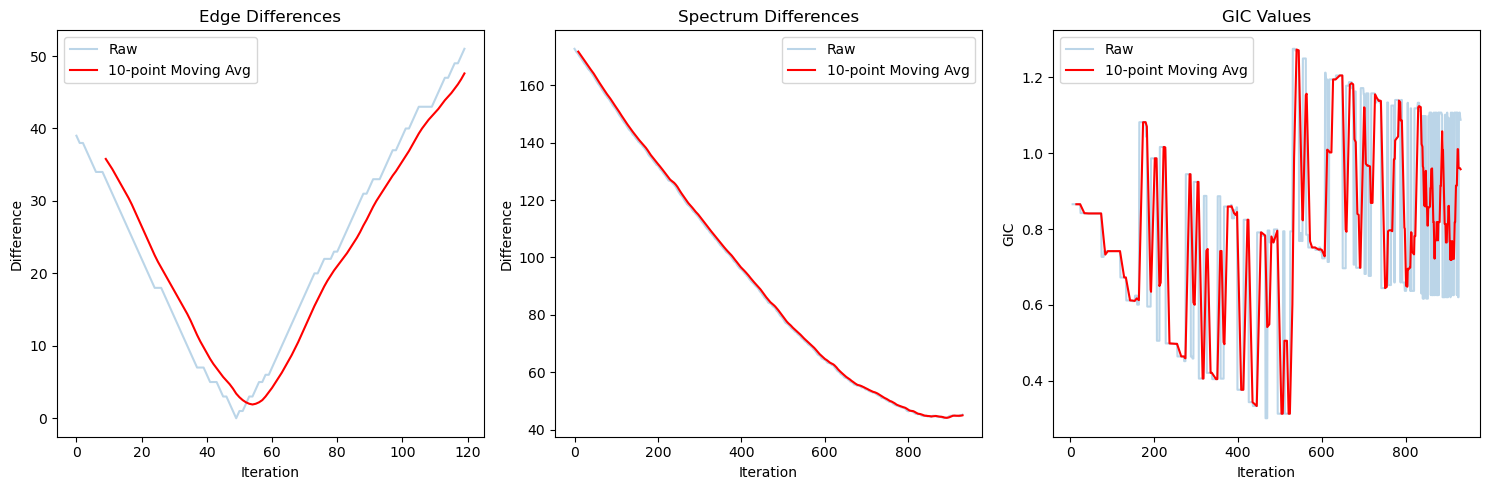

In [14]:
spec_diff = graph.fitted_graphs_data['LG']['metadata']['spectrum_diffs']
edge_diff = graph.fitted_graphs_data['LG']['metadata']['edge_diffs']
gic_values = graph.fitted_graphs_data['LG']['metadata']['gic_values']

# Calculate moving averages with window size of 10
window = 10
edge_diff_ma = pd.Series(edge_diff).rolling(window=window).mean()
spec_diff_ma = pd.Series(spec_diff).rolling(window=window).mean()
gic_values_ma = pd.Series(gic_values).rolling(window=window).mean()

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(edge_diff, alpha=0.3, label='Raw')
plt.plot(edge_diff_ma, 'r-', label=f'{window}-point Moving Avg')
plt.title('Edge Differences')
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.legend()

plt.subplot(1,3,2)
plt.plot(spec_diff, alpha=0.3, label='Raw')
plt.plot(spec_diff_ma, 'r-', label=f'{window}-point Moving Avg')
plt.title('Spectrum Differences')
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.legend()

plt.subplot(1,3,3)
plt.plot(gic_values, alpha=0.3, label='Raw')
plt.plot(gic_values_ma, 'r-', label=f'{window}-point Moving Avg')
plt.title('GIC Values')
plt.xlabel('Iteration')
plt.ylabel('GIC')
plt.legend()

plt.tight_layout()
plt.show()

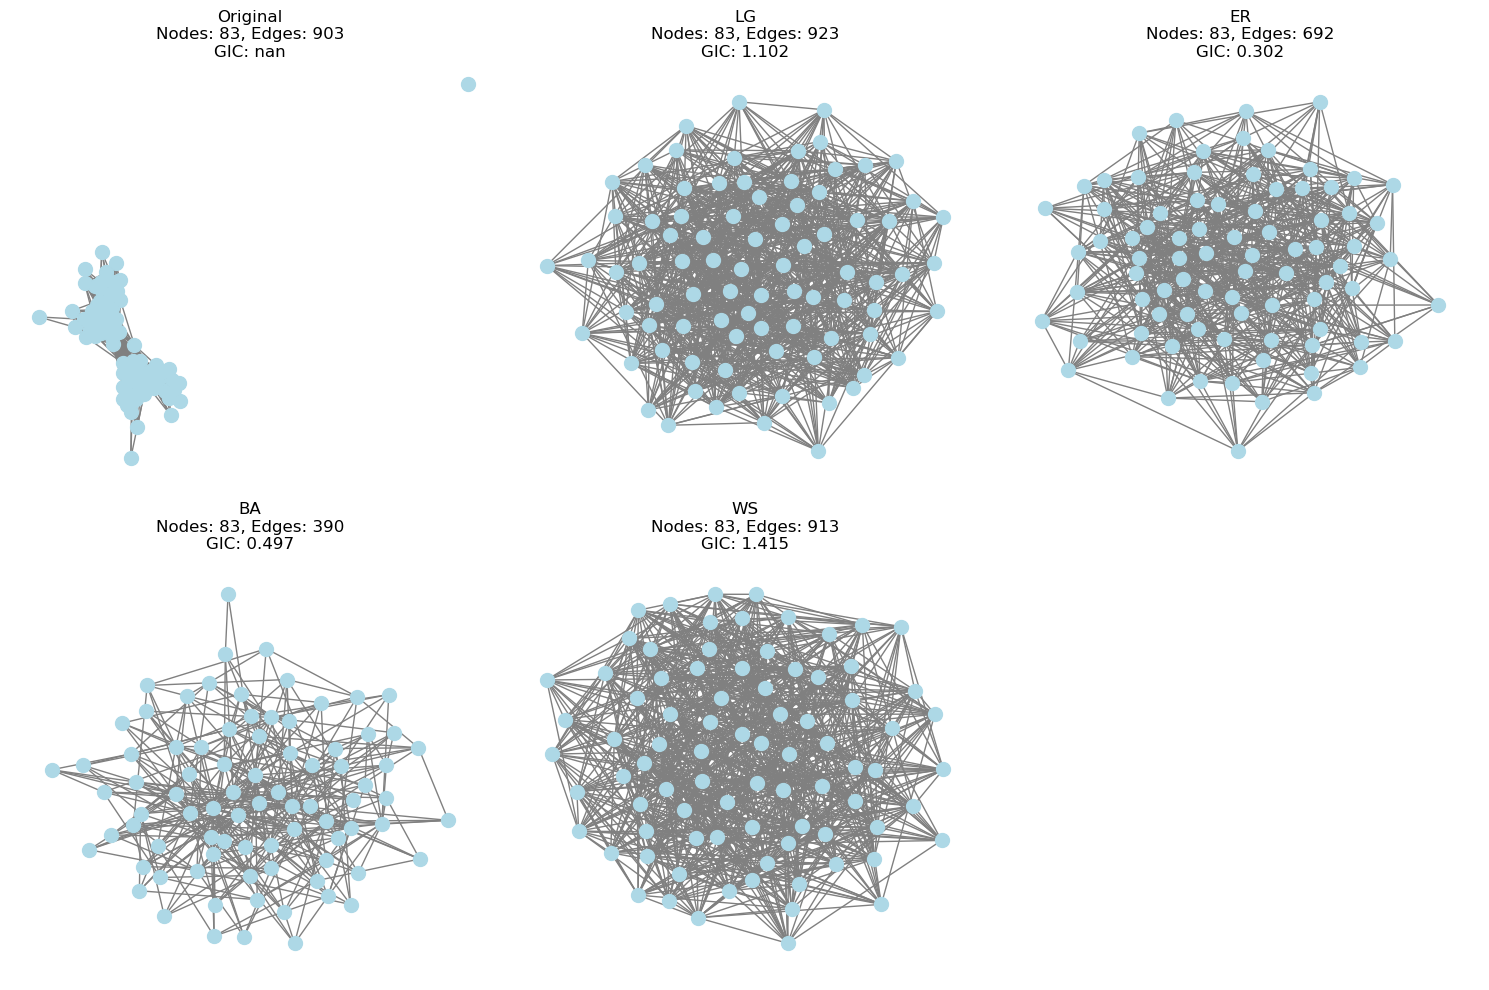

In [15]:
# Get the graph data for each model
graph_data = graph.fitted_graphs_data

# Create a figure with subplots for each model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot each graph
for i, (model, data) in enumerate(graph_data.items()):
    graph2 = data['graph']
    pos = nx.spring_layout(graph2, seed=42)
    
    nx.draw(graph2, pos, ax=axes[i], 
            node_size=100,
            node_color='lightblue',
            edge_color='gray',
            with_labels=False)
    
    # Add title with model name and key metrics
    attrs = data['attributes']
    gic = data['metadata'].get('gic_value', 'N/A')
    title = f"{model}\n"
    title += f"Nodes: {attrs['nodes']}, Edges: {attrs['edges']}\n"
    # title += f"Density: {attrs['density']:.2f}\n"
    # title += f"Avg Clustering: {attrs['avg_clustering']:.2f}\n"
    title += f"GIC: {gic:.3f}" if isinstance(gic, float) else f"GIC: {gic}"
    axes[i].set_title(title)

# Remove extra subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

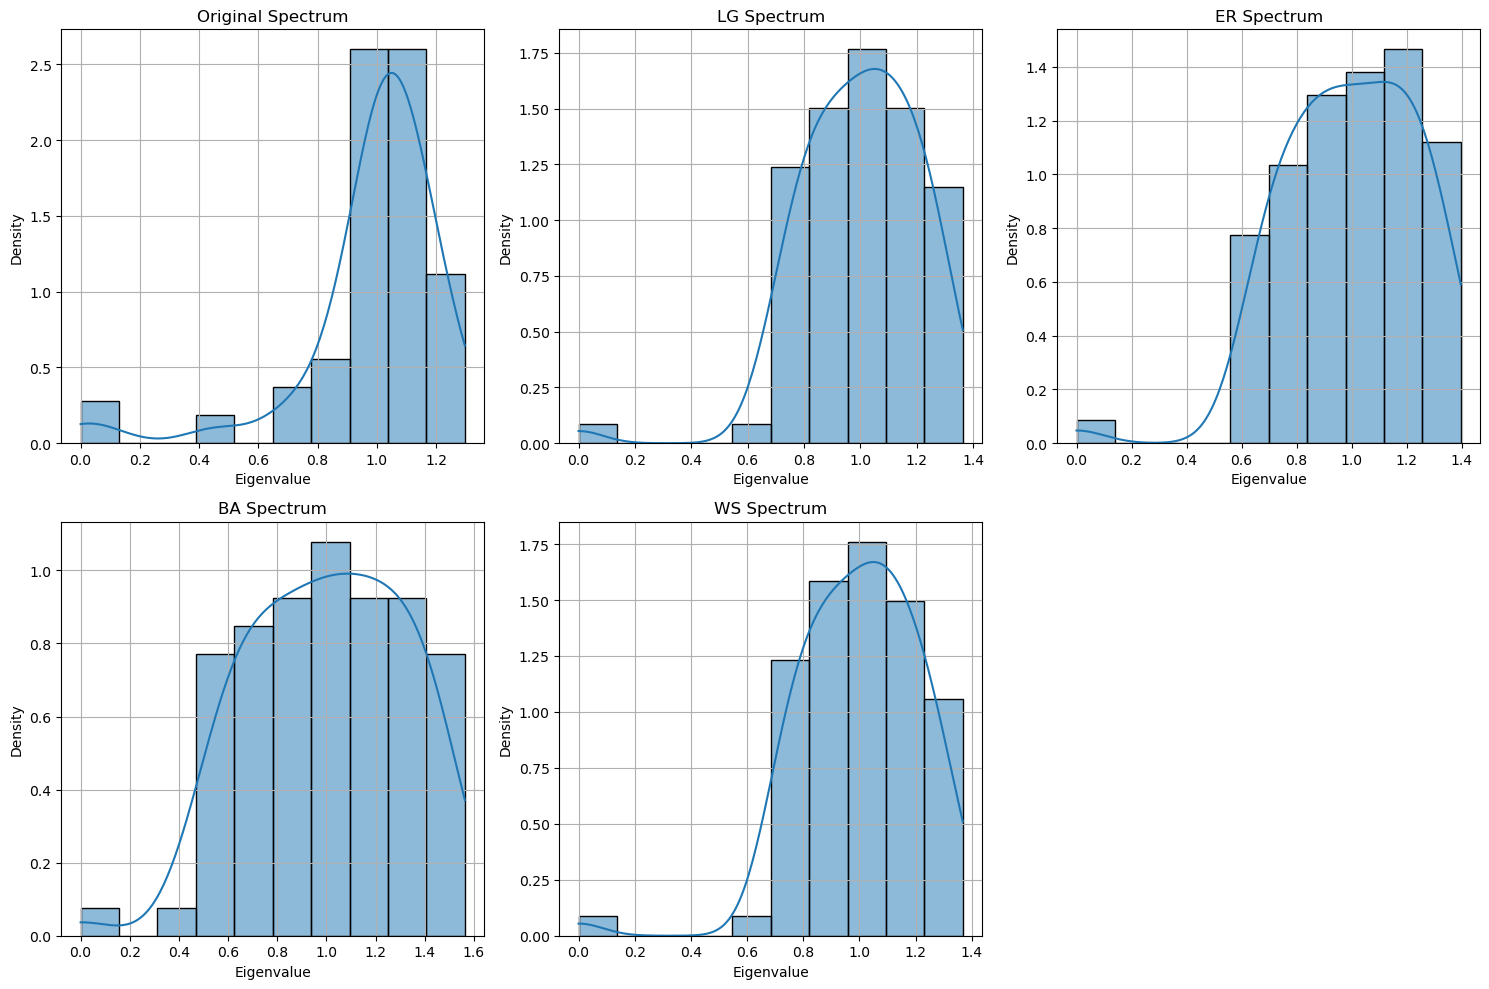

In [16]:
# Get the graph data for each model
graph_data = graph.fitted_graphs_data

# Create a figure with subplots for each model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot spectrum for each graph
for i, (model, data) in enumerate(graph_data.items()):
    graph = data['graph']
    
    try:
        # Calculate eigenvalues
        L = nx.normalized_laplacian_matrix(graph)
        eigenvalues = np.linalg.eigvals(L.toarray())
        eigenvalues = np.real(eigenvalues)  # Get real parts
        
        # Plot histogram and KDE with reduced number of bins
        sns.histplot(data=eigenvalues, kde=True, ax=axes[i], stat='density', bins=10)
        axes[i].set_title(f"{model} Spectrum")
        axes[i].set_xlabel("Eigenvalue")
        axes[i].set_ylabel("Density")
        axes[i].grid(True)
    except MemoryError:
        axes[i].text(0.5, 0.5, "Memory Error", ha='center', va='center')
        axes[i].set_title(f"{model} Spectrum (Failed)")

# Remove extra subplot
axes[-1].remove()

plt.tight_layout()
plt.show()


# Gen all Plots

human_0


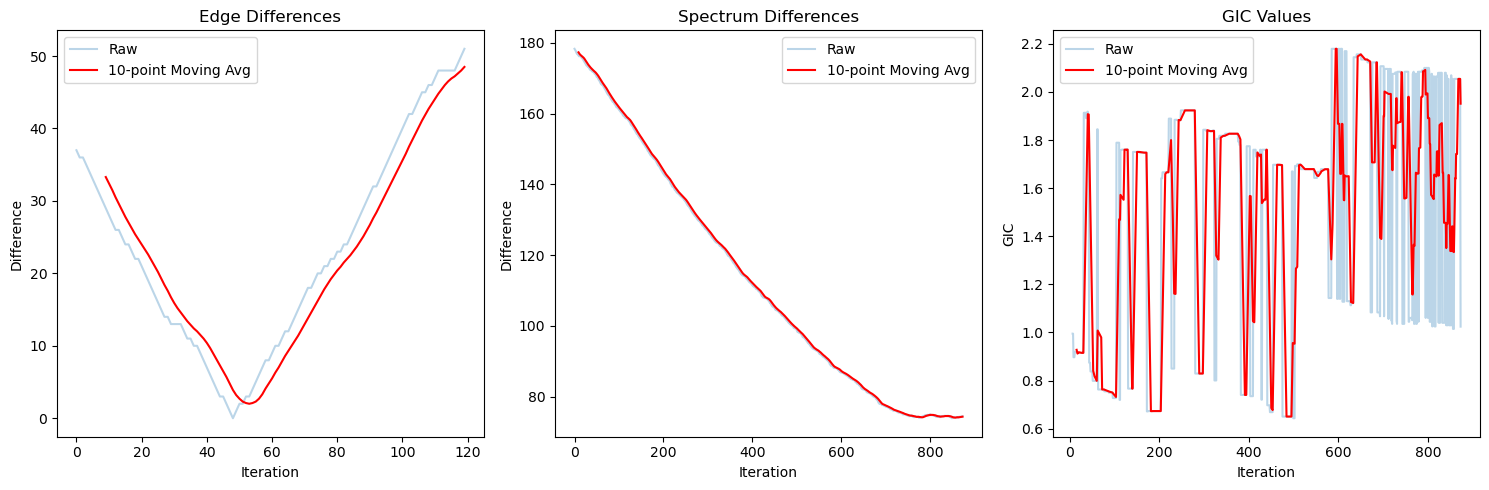

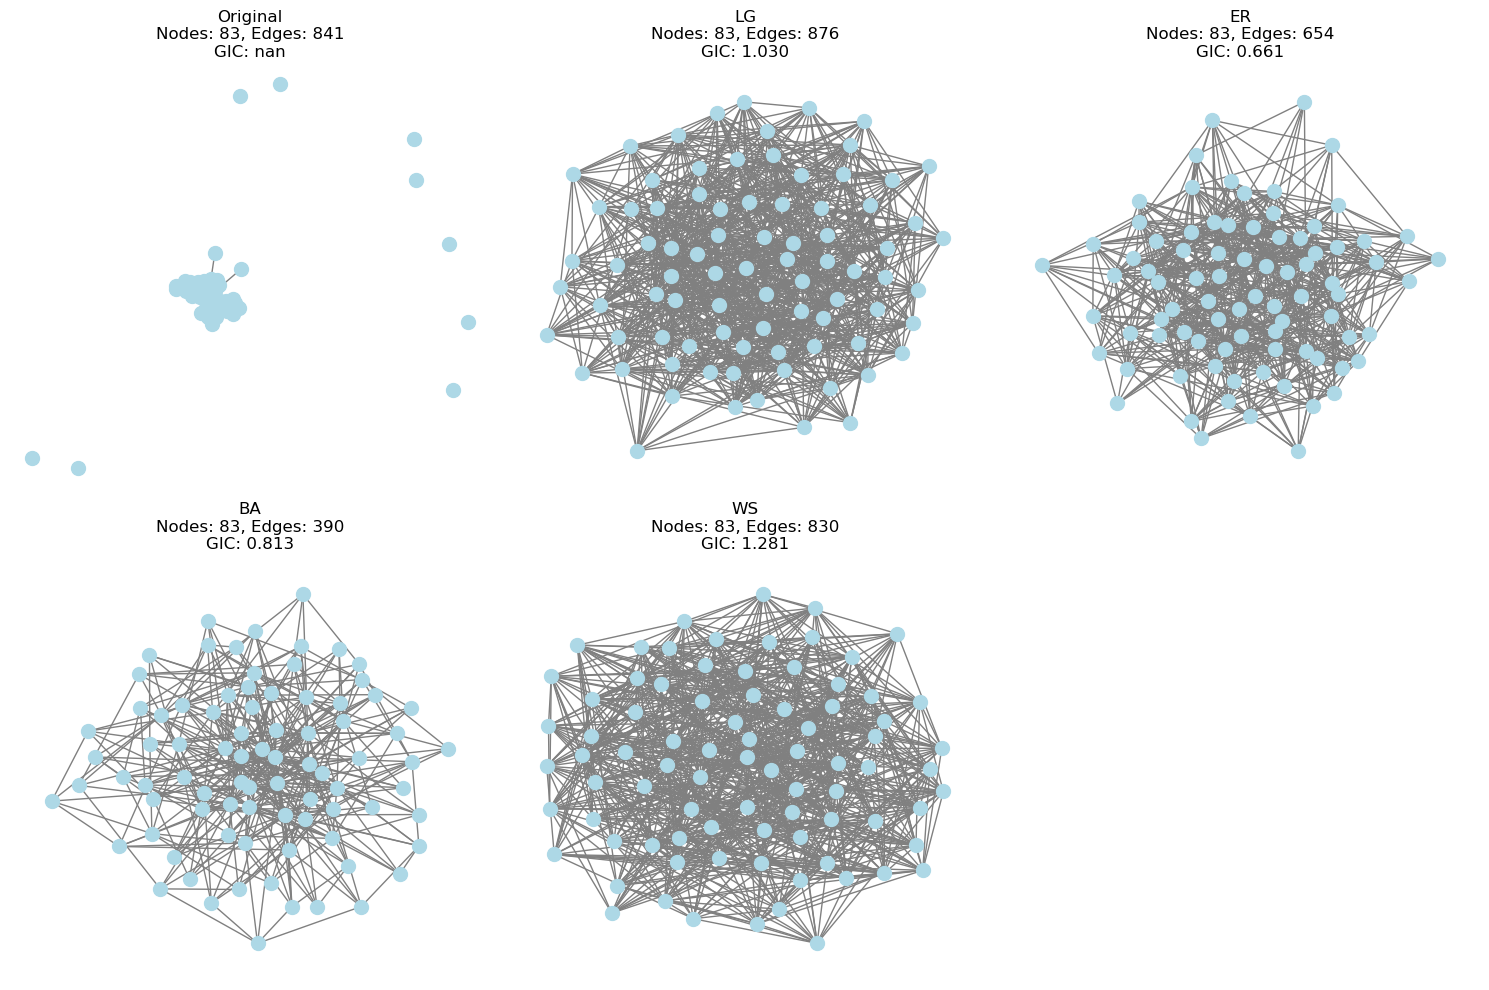

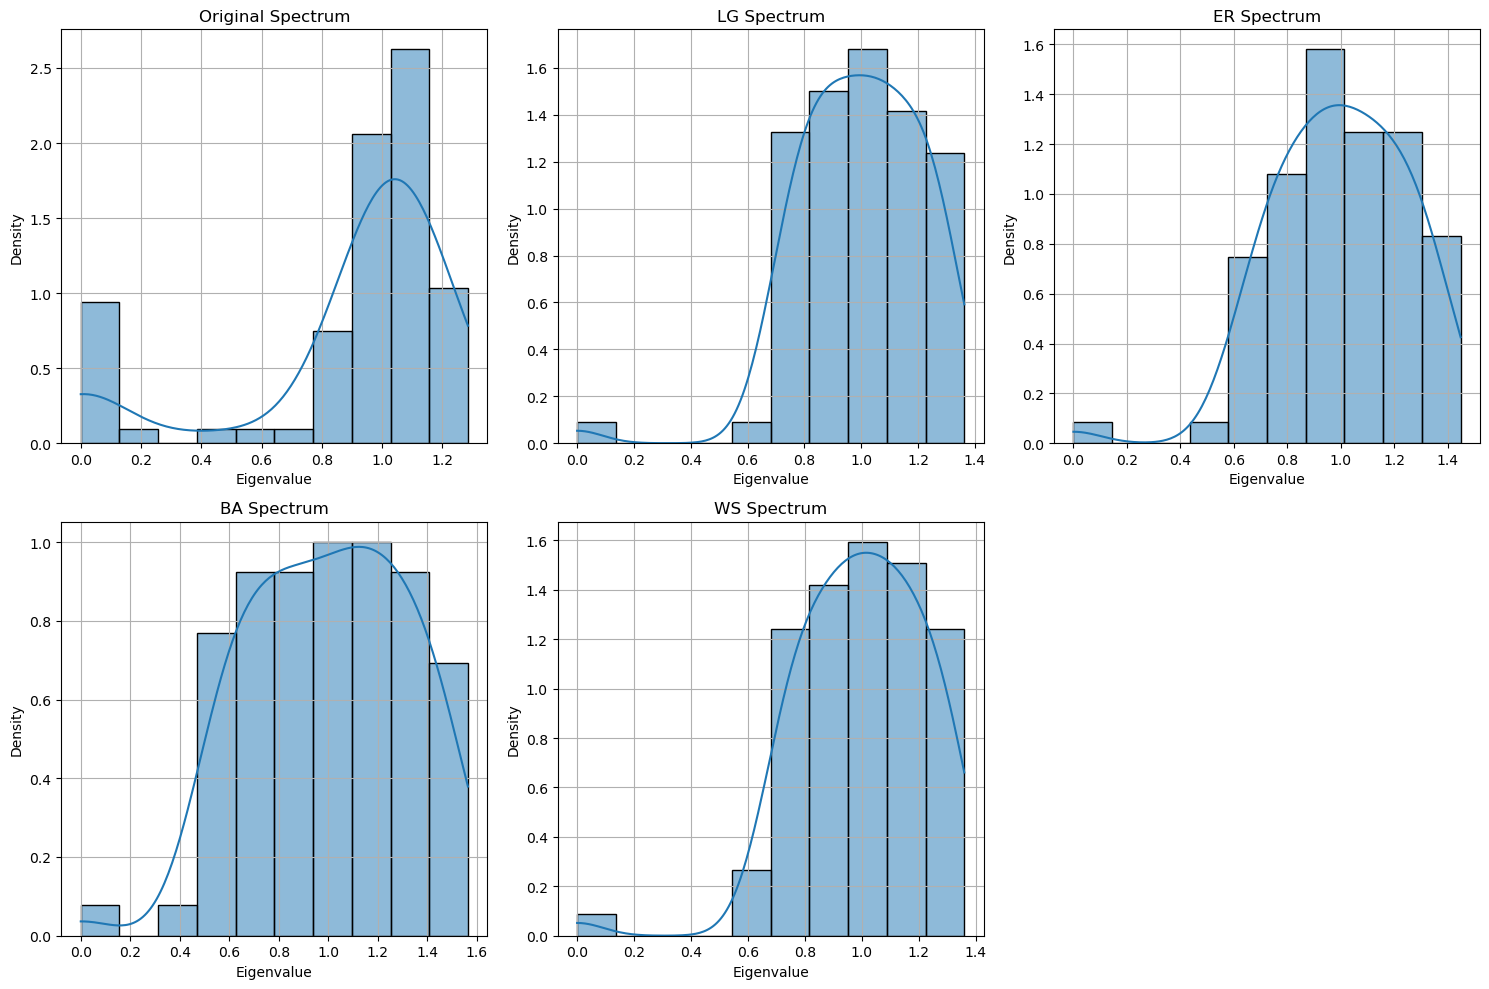

human_1


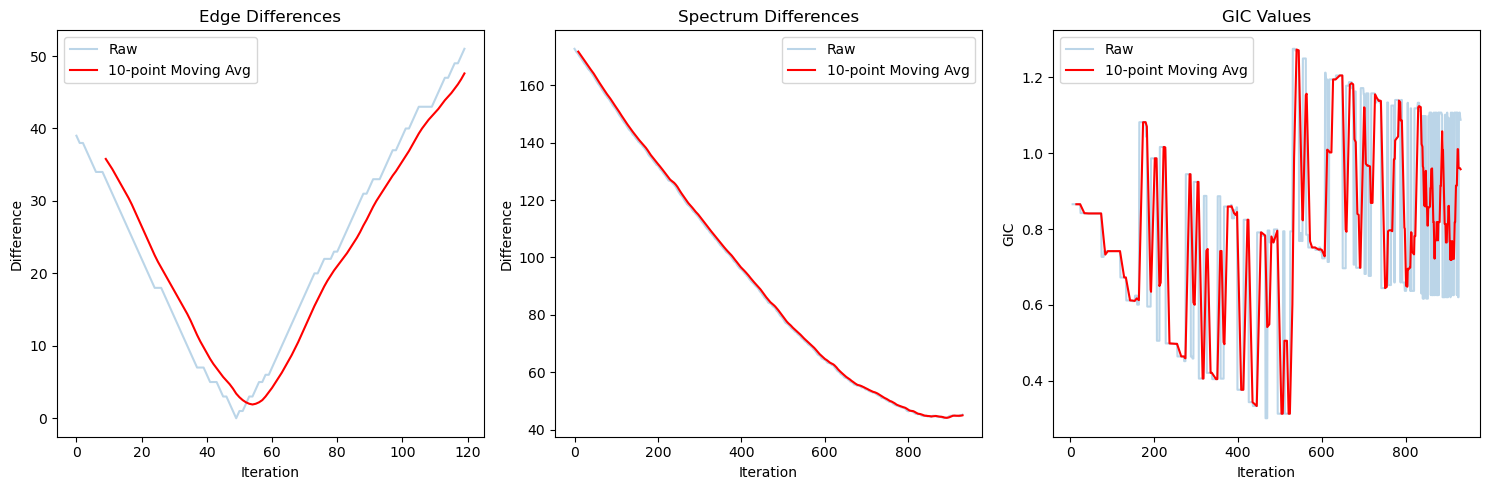

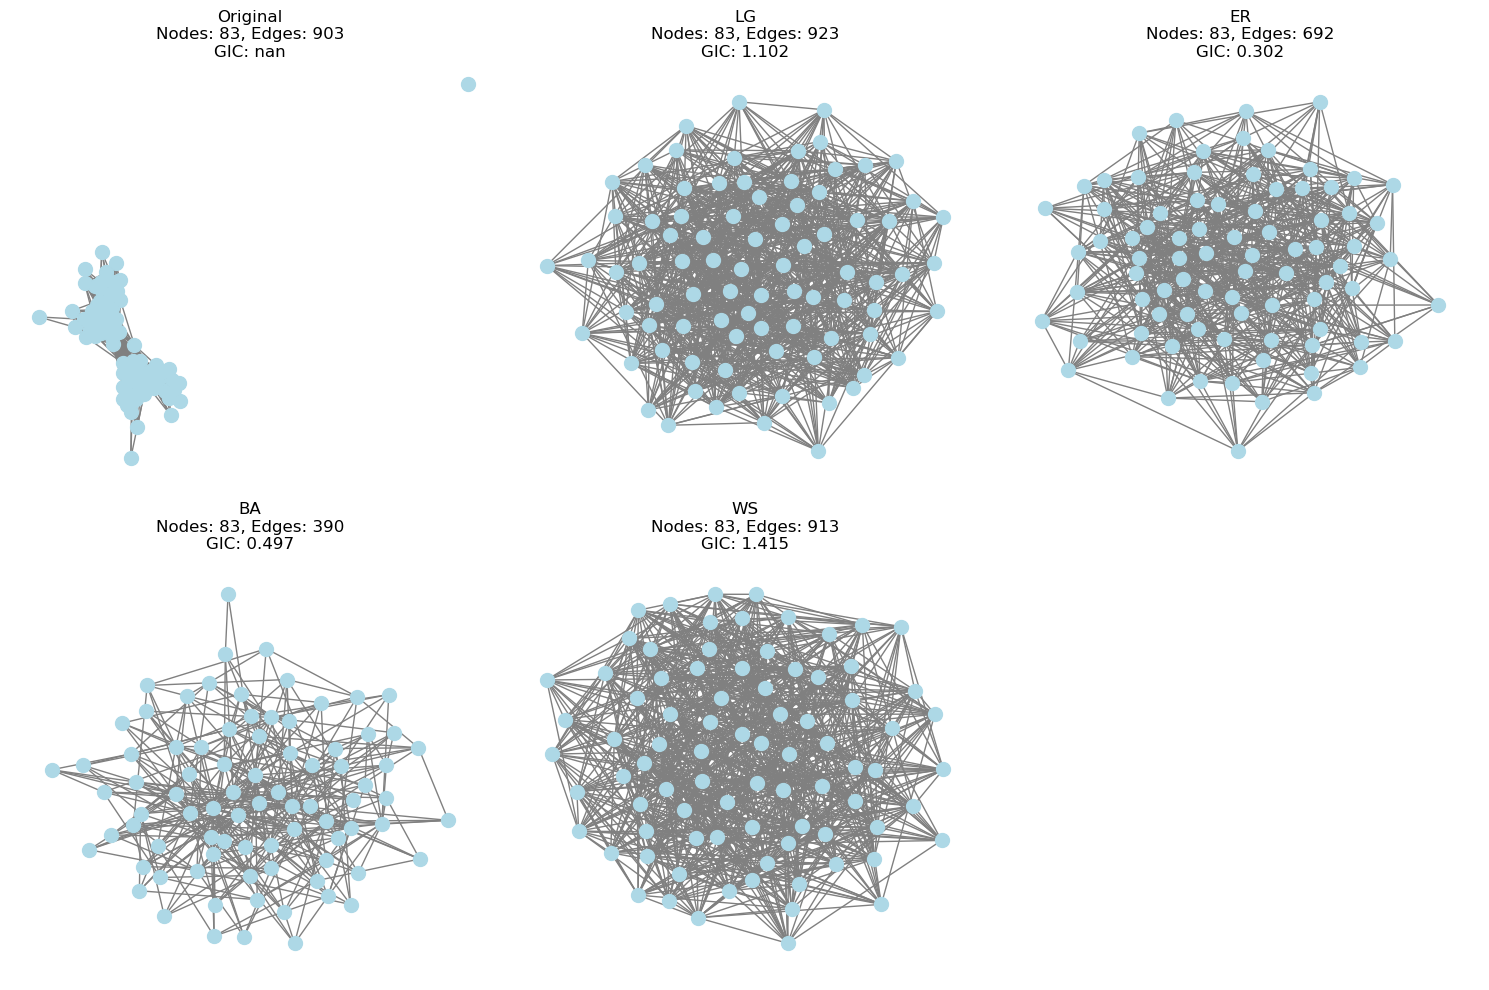

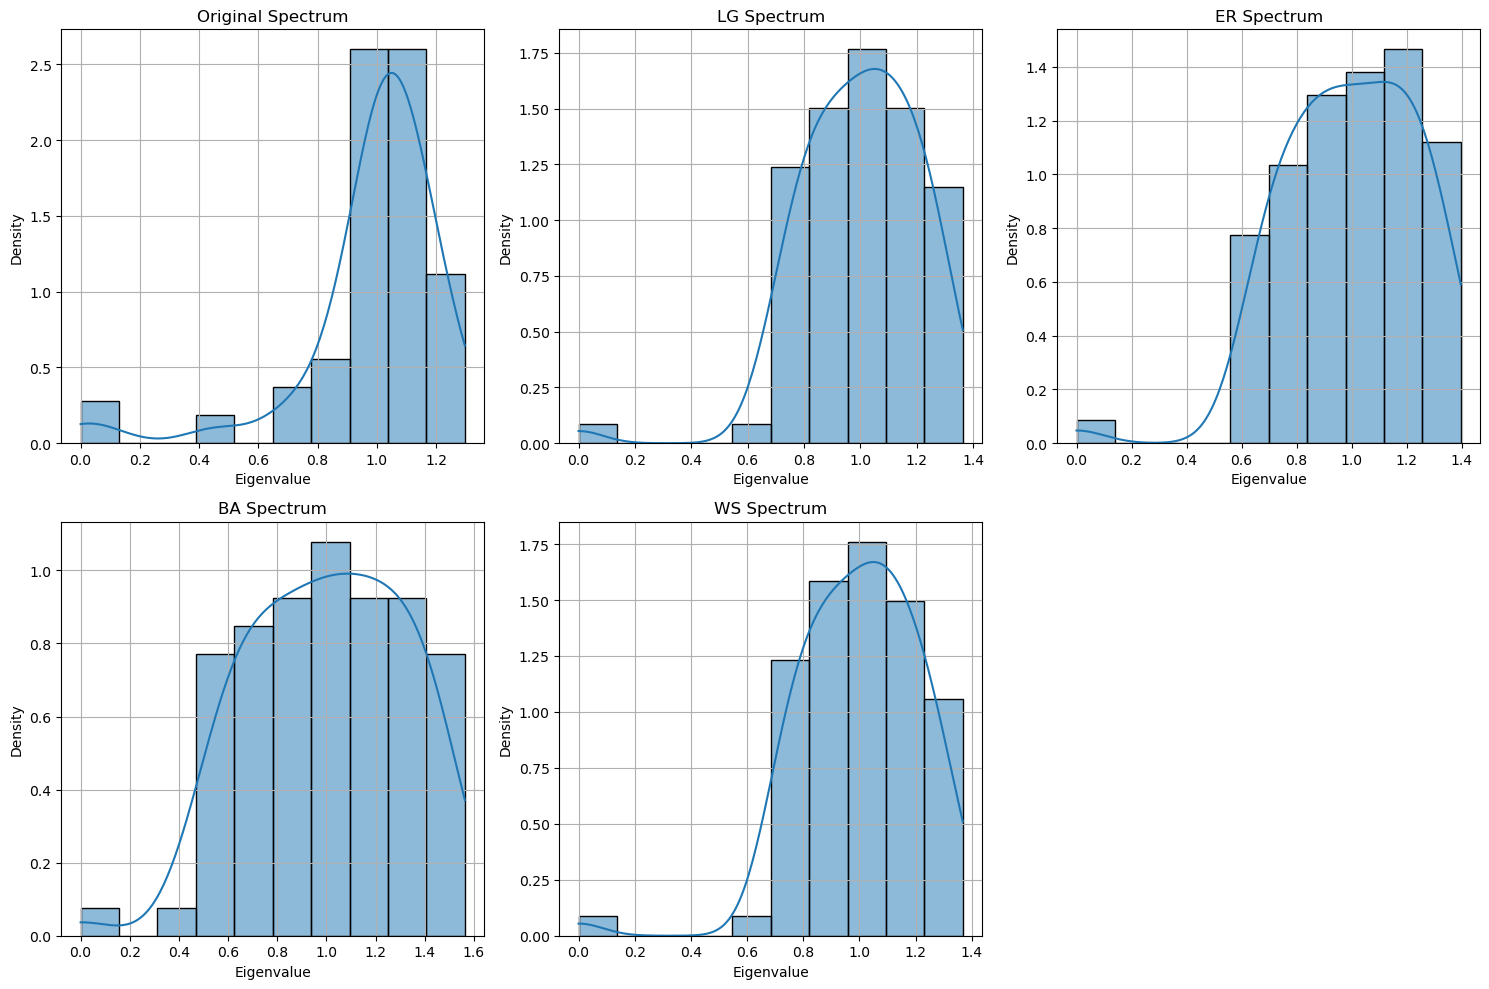

human_2


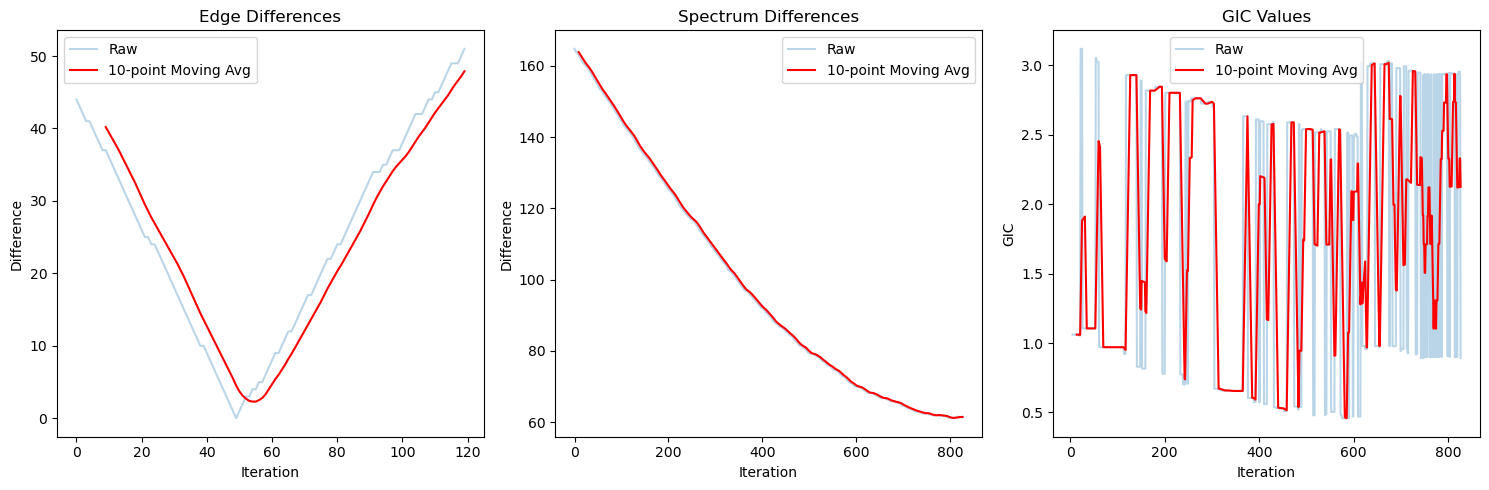

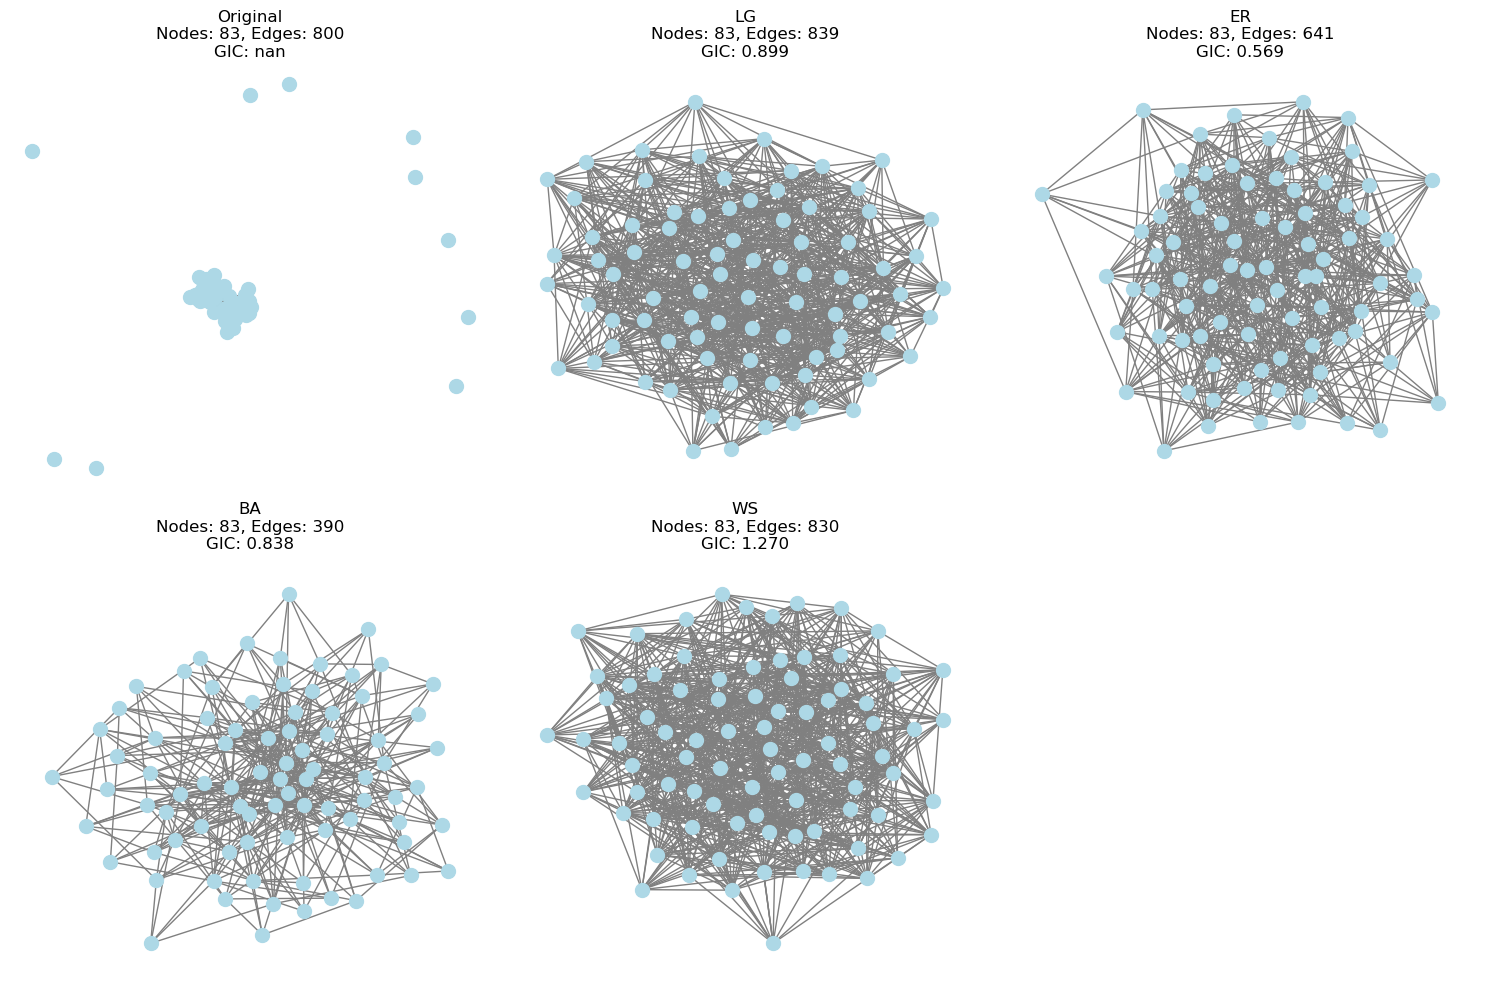

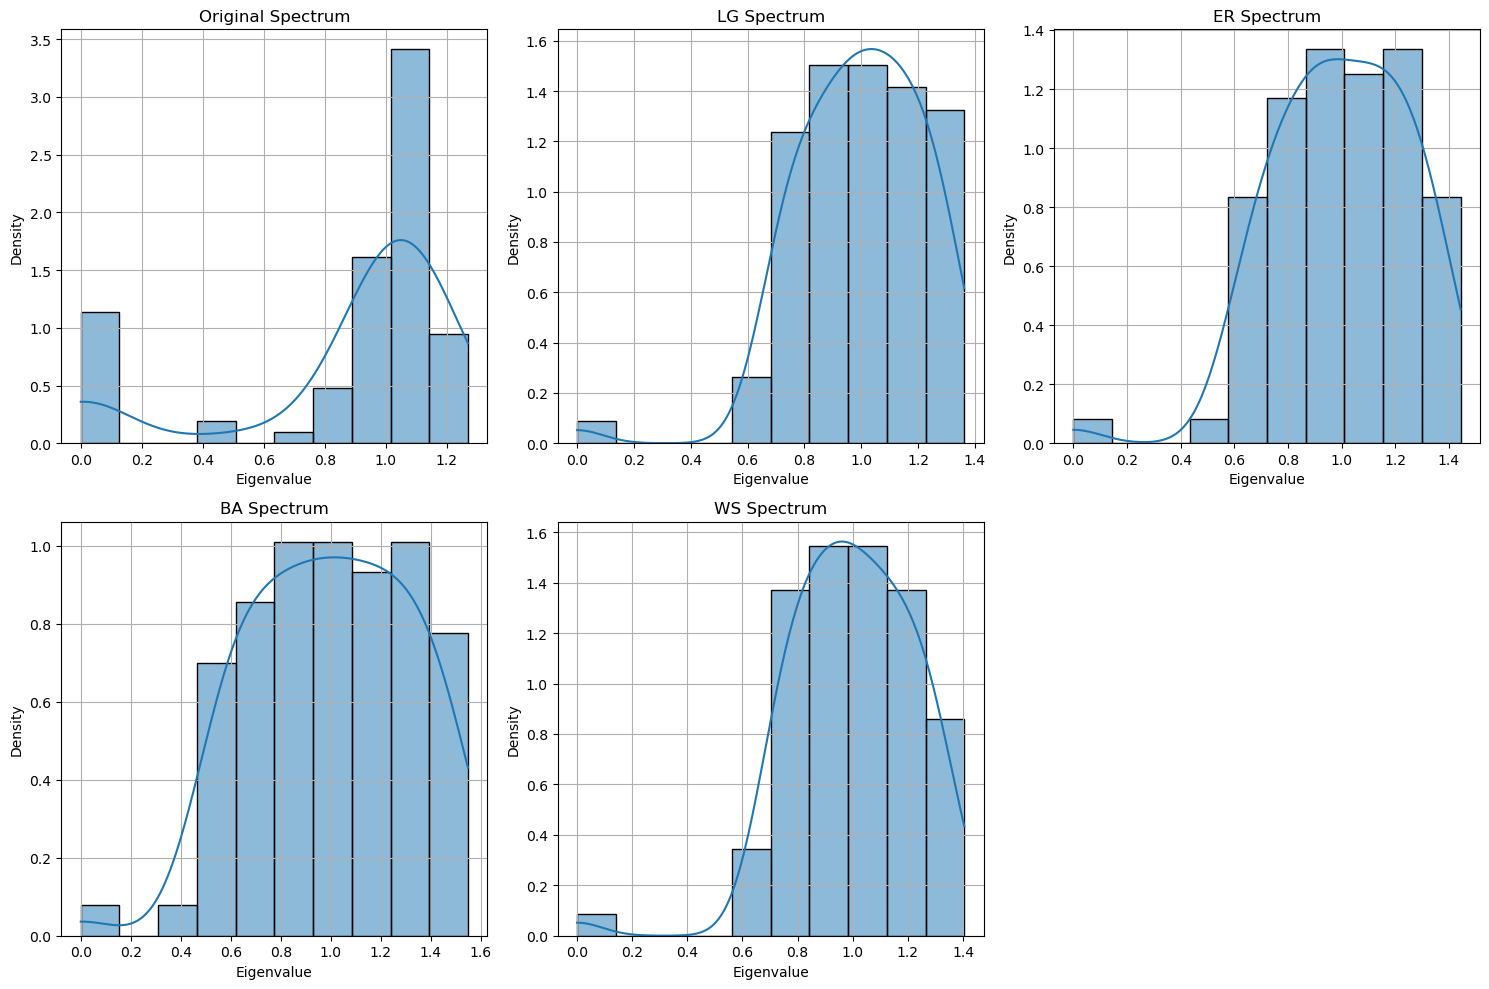

human_3


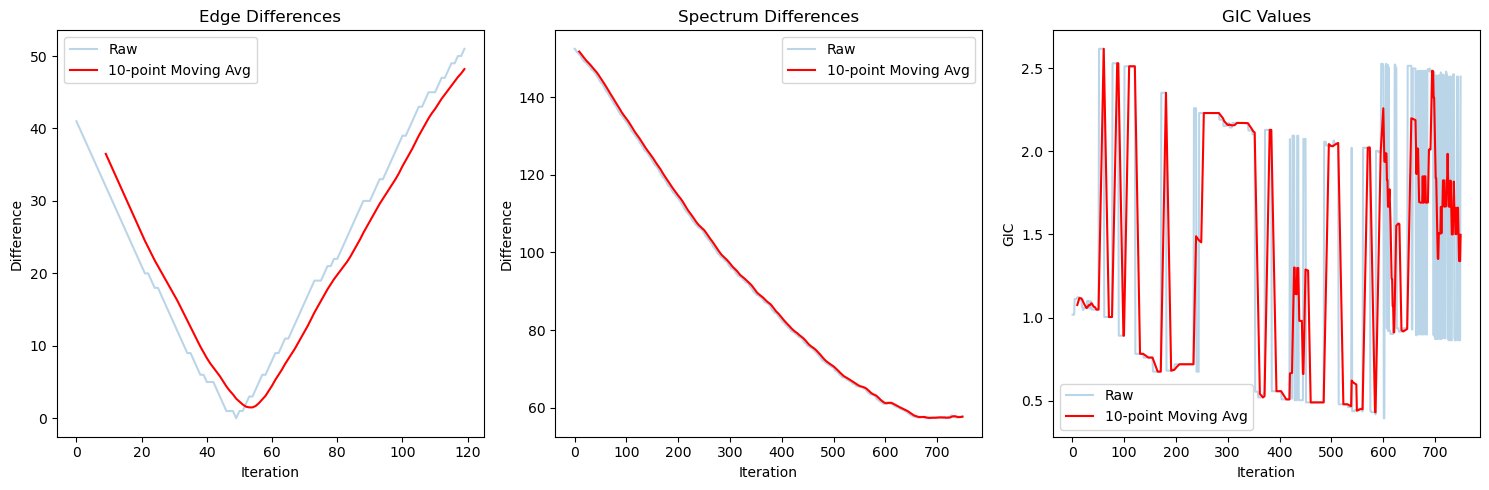

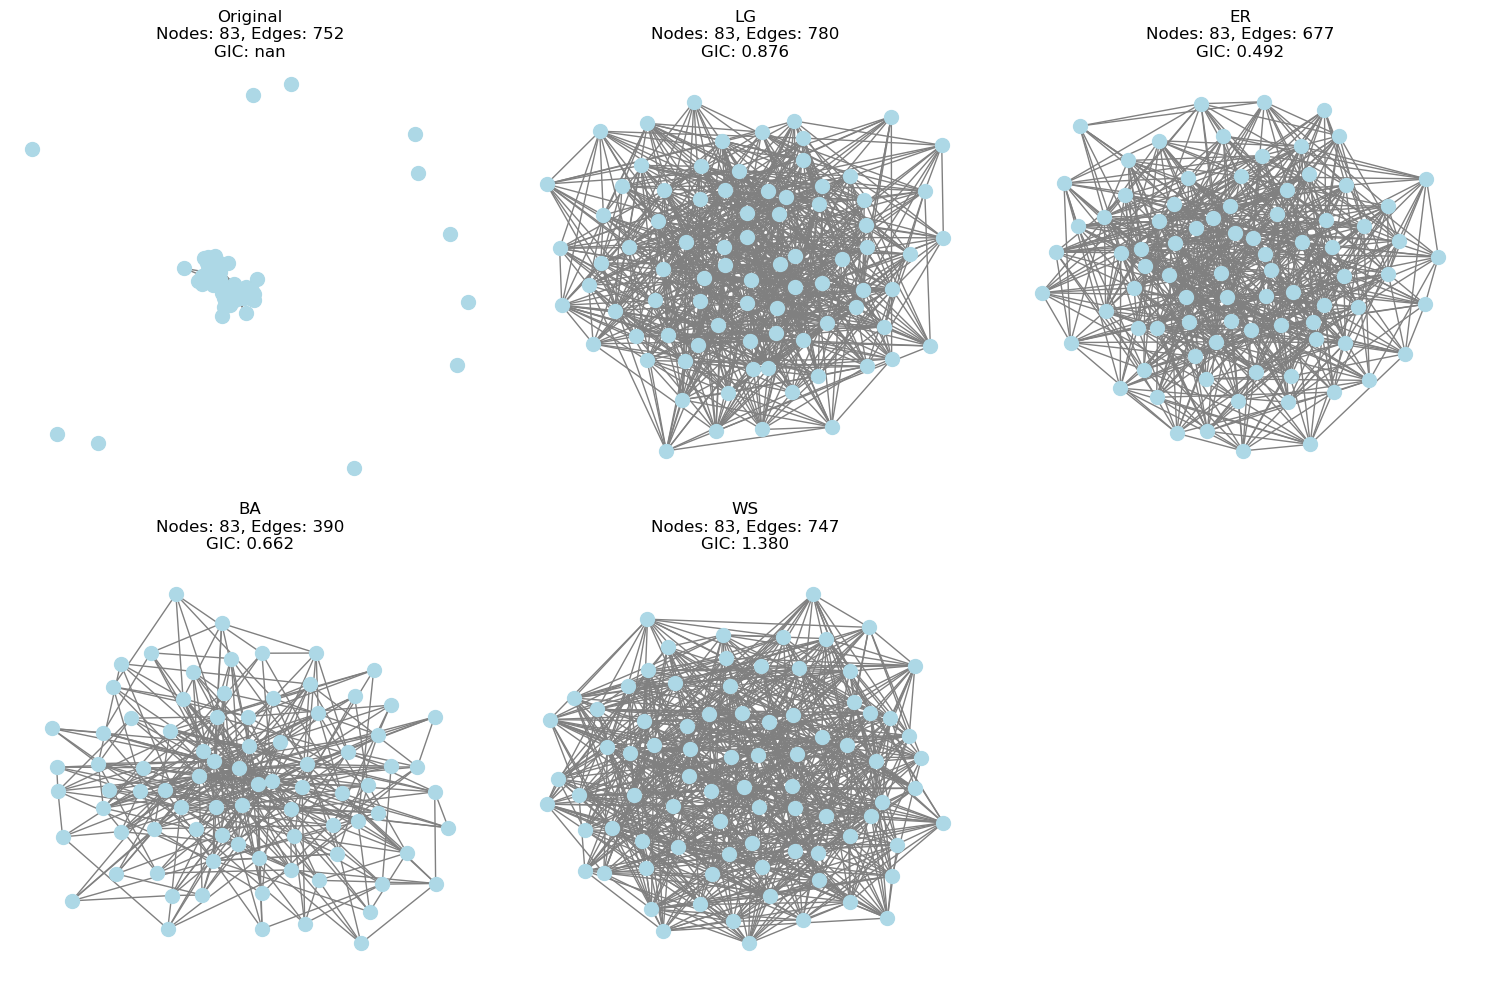

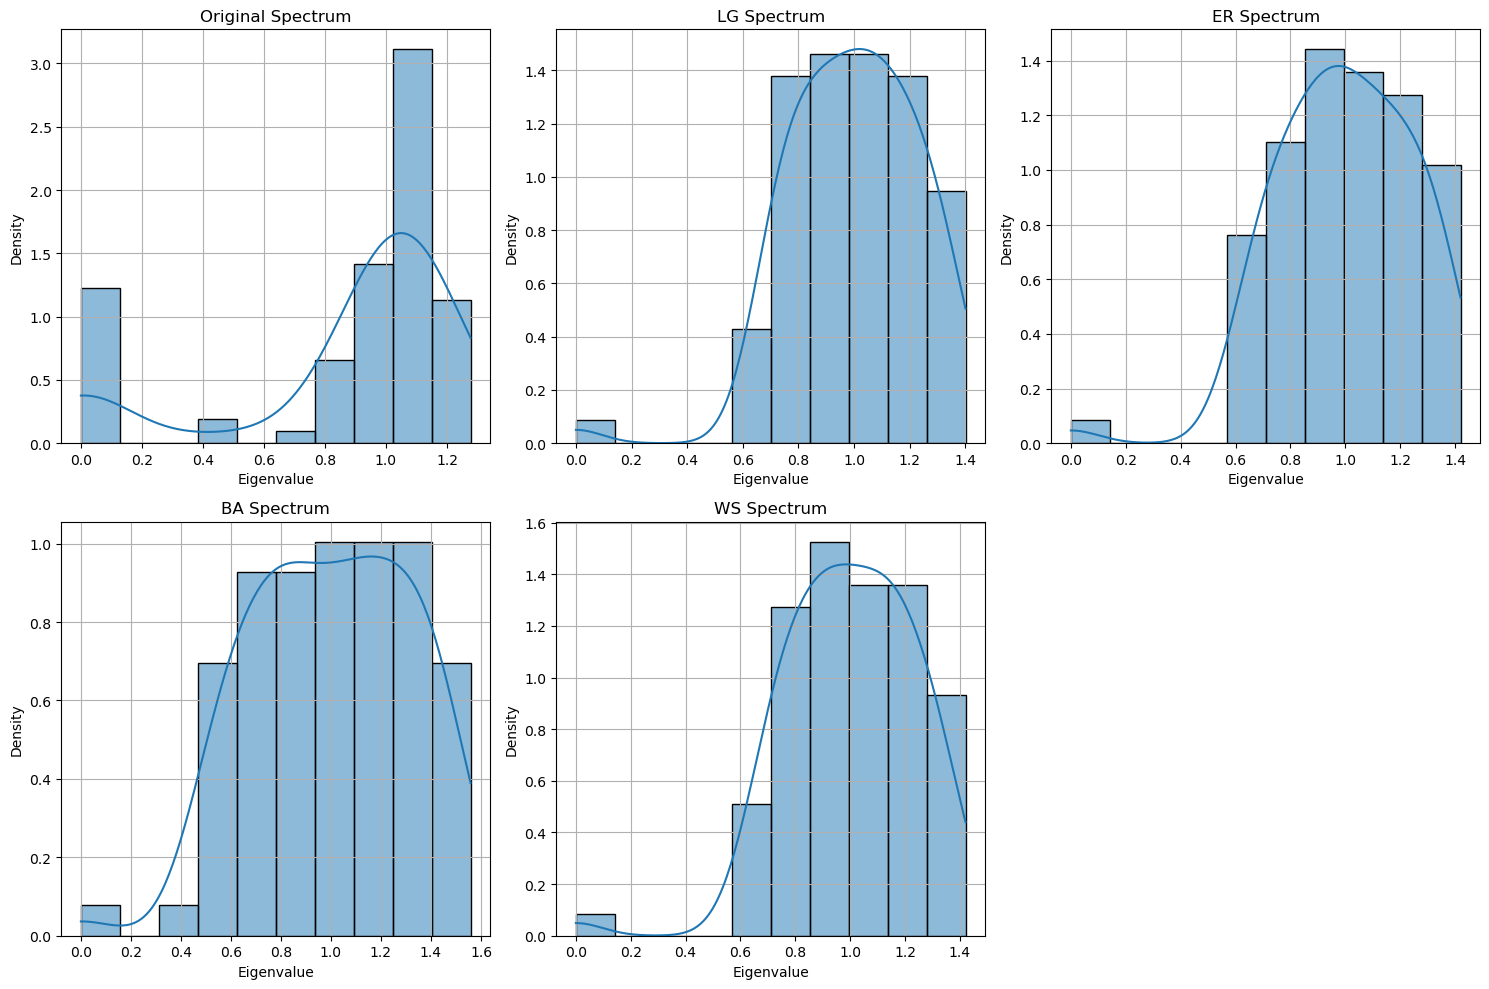

human_4


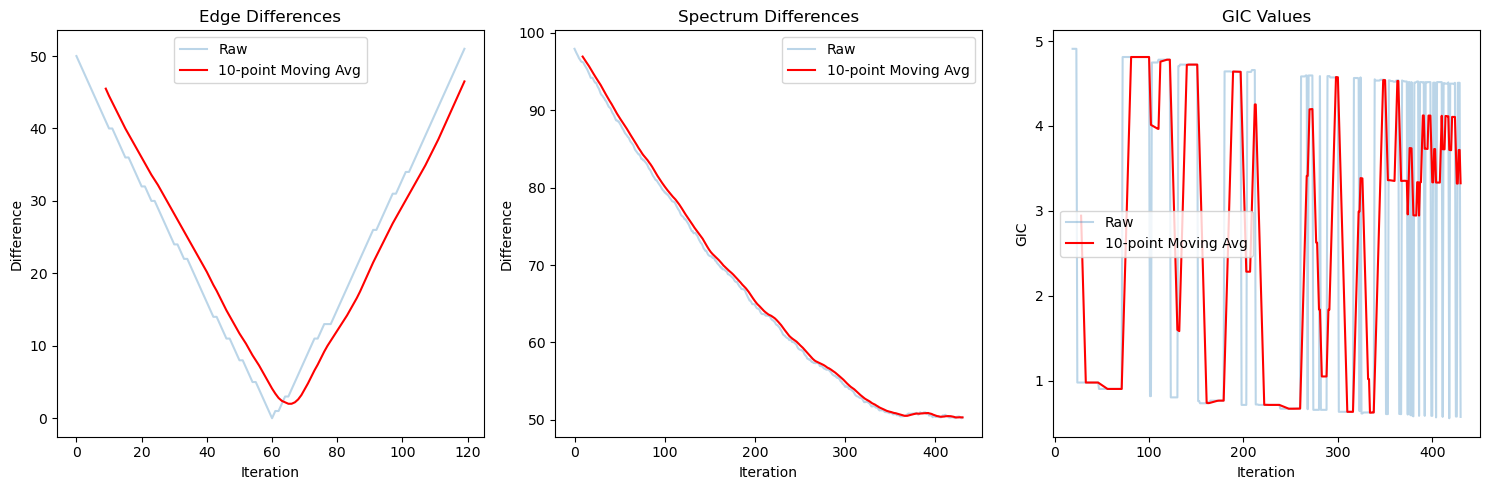

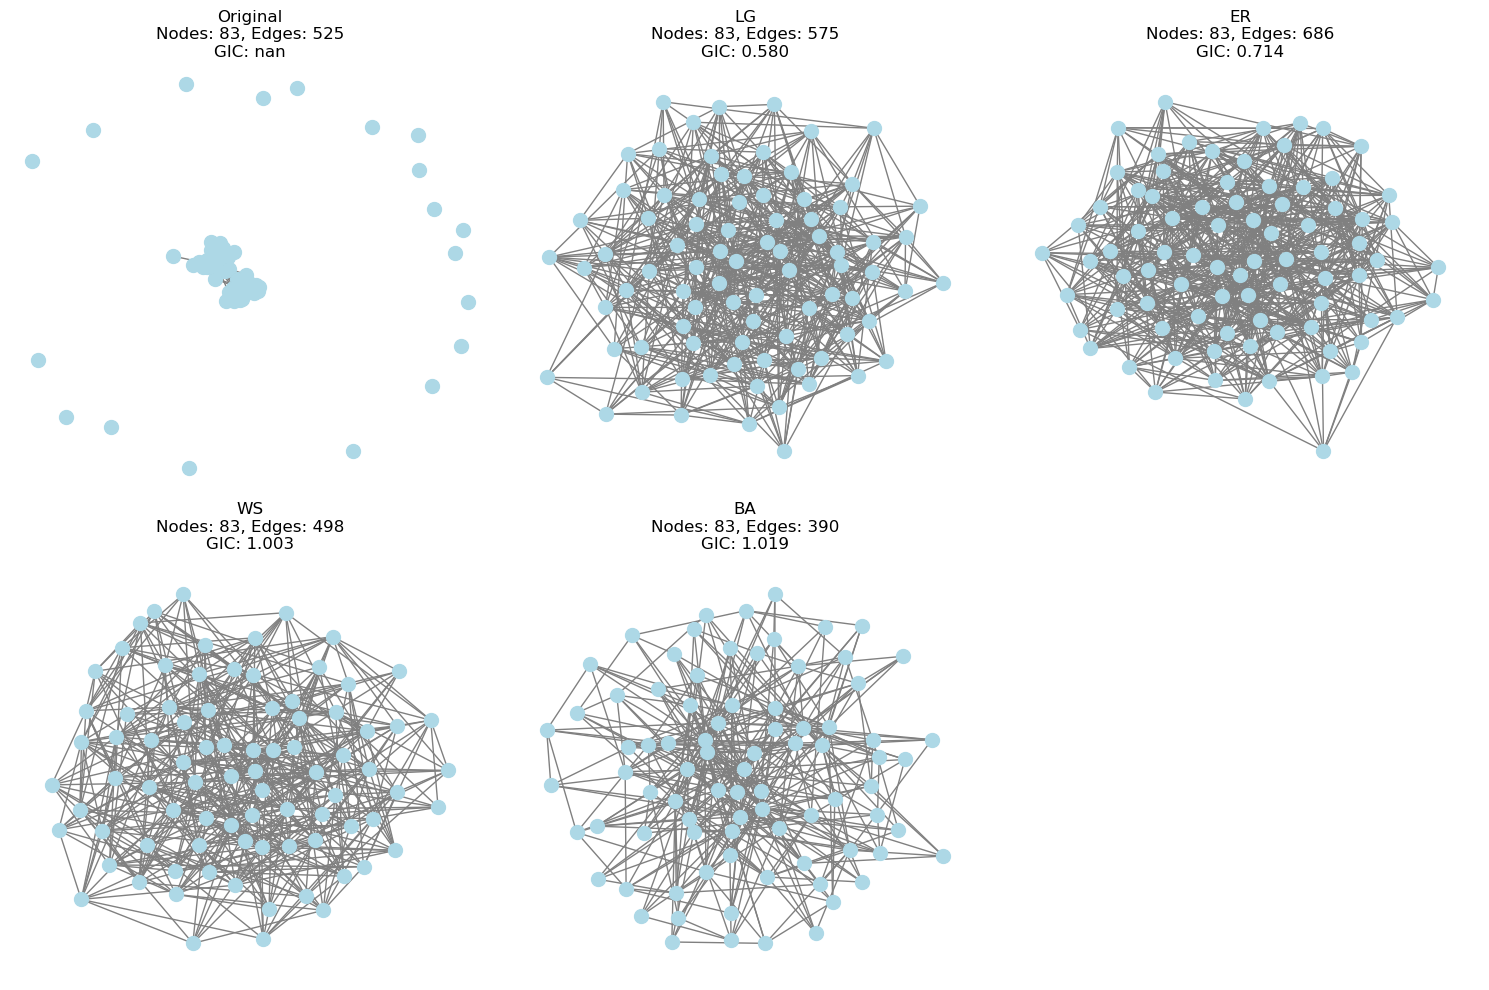

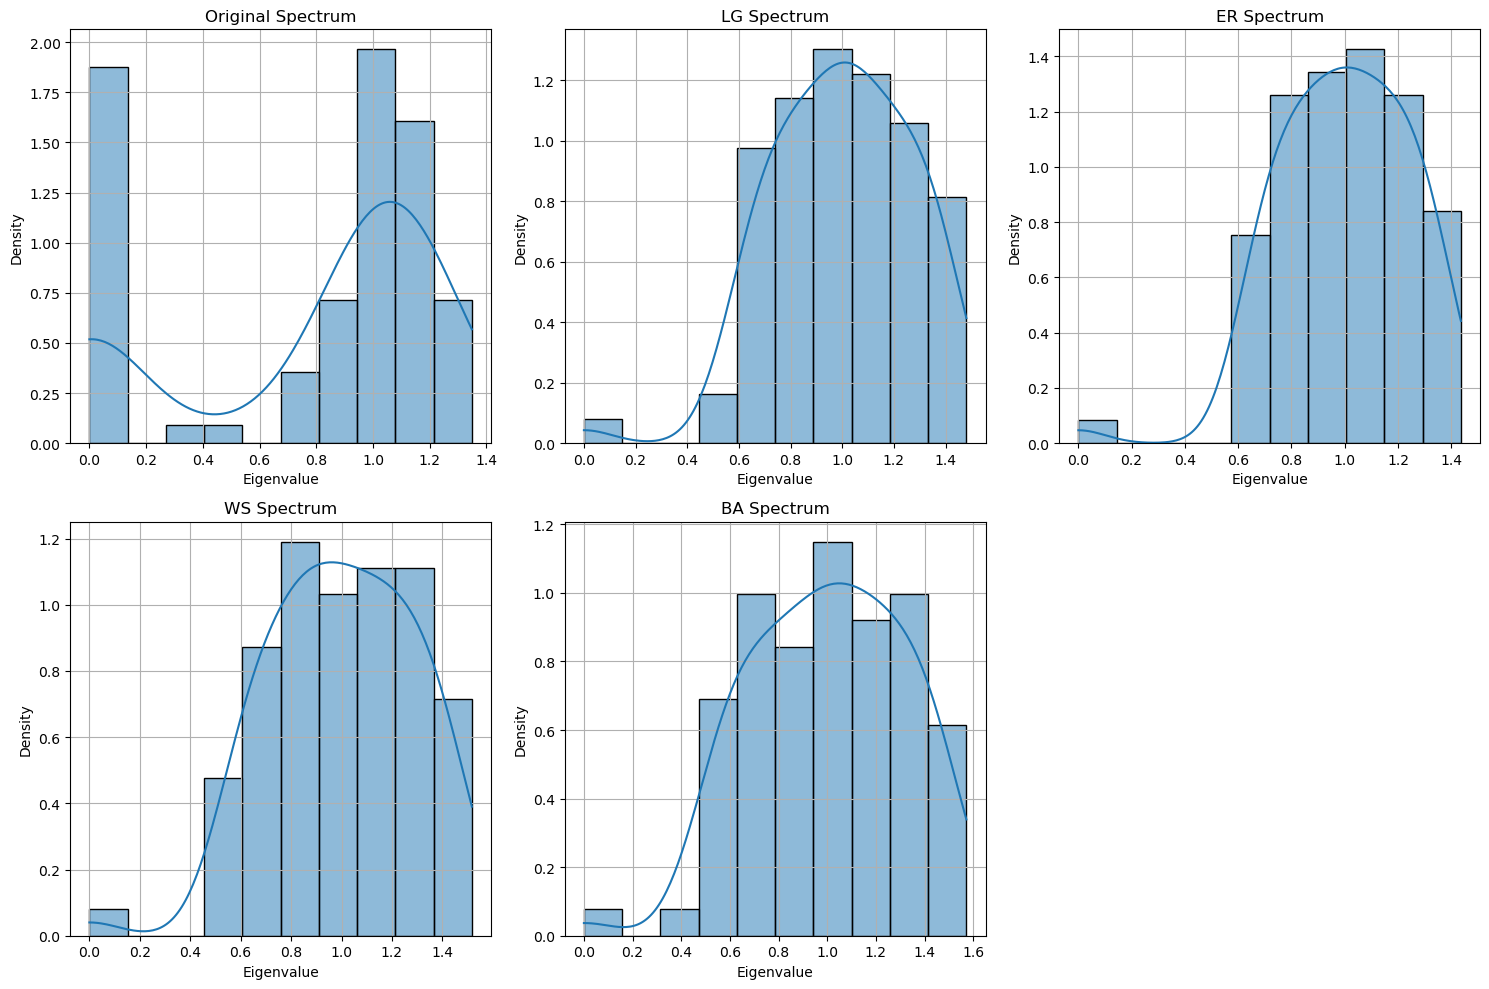

In [17]:
# Gen all plots
os.makedirs(f'imgs', exist_ok=True)
for i in range(len(comparators)):
    if i == 5:
        break
    graph = comparators[i]
    graph_name = f'human_{i}'
    print(graph_name)

    #graph = find_comparator_for_connectome('rhesus_cerebral.cortex_1.graphml')
    os.makedirs(f'imgs', exist_ok=True)
    spec_diff = graph.fitted_graphs_data['LG']['metadata']['spectrum_diffs']
    edge_diff = graph.fitted_graphs_data['LG']['metadata']['edge_diffs']
    gic_values = graph.fitted_graphs_data['LG']['metadata']['gic_values']

    # Calculate moving averages with window size of 10
    window = 10
    edge_diff_ma = pd.Series(edge_diff).rolling(window=window).mean()
    spec_diff_ma = pd.Series(spec_diff).rolling(window=window).mean()
    gic_values_ma = pd.Series(gic_values).rolling(window=window).mean()

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.plot(edge_diff, alpha=0.3, label='Raw')
    plt.plot(edge_diff_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('Edge Differences')
    plt.xlabel('Iteration')
    plt.ylabel('Difference')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(spec_diff, alpha=0.3, label='Raw')
    plt.plot(spec_diff_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('Spectrum Differences')
    plt.xlabel('Iteration')
    plt.ylabel('Difference')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(gic_values, alpha=0.3, label='Raw')
    plt.plot(gic_values_ma, 'r-', label=f'{window}-point Moving Avg')
    plt.title('GIC Values')
    plt.xlabel('Iteration')
    plt.ylabel('GIC')
    plt.legend()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_iteration.png', bbox_inches='tight', dpi=300)

    plt.show()
    # Get the graph data for each model
    graph_data = graph.fitted_graphs_data

    # Create a figure with subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot each graph
    for i, (model, data) in enumerate(graph_data.items()):
        graph2 = data['graph']
        pos = nx.spring_layout(graph2, seed=42)
        
        nx.draw(graph2, pos, ax=axes[i], 
                node_size=100,
                node_color='lightblue',
                edge_color='gray',
                with_labels=False)
        
        # Add title with model name and key metrics
        attrs = data['attributes']
        gic = data['metadata'].get('gic_value', 'N/A')
        title = f"{model}\n"
        title += f"Nodes: {attrs['nodes']}, Edges: {attrs['edges']}\n"
        # title += f"Density: {attrs['density']:.2f}\n"
        # title += f"Avg Clustering: {attrs['avg_clustering']:.2f}\n"
        title += f"GIC: {gic:.3f}" if isinstance(gic, float) else f"GIC: {gic}"
        axes[i].set_title(title)

    # Remove extra subplot
    axes[-1].remove()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_graph.png', bbox_inches='tight', dpi=300)

    plt.show()
    # Get the graph data for each model
    graph_data = graph.fitted_graphs_data

    # Create a figure with subplots for each model
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot spectrum for each graph
    for i, (model, data) in enumerate(graph_data.items()):
        graph = data['graph']
        
        try:
            # Calculate eigenvalues
            L = nx.normalized_laplacian_matrix(graph)
            eigenvalues = np.linalg.eigvals(L.toarray())
            eigenvalues = np.real(eigenvalues)  # Get real parts
            
            # Plot histogram and KDE with reduced number of bins
            sns.histplot(data=eigenvalues, kde=True, ax=axes[i], stat='density', bins=10)
            axes[i].set_title(f"{model} Spectrum")
            axes[i].set_xlabel("Eigenvalue")
            axes[i].set_ylabel("Density")
            axes[i].grid(True)
        except MemoryError:
            axes[i].text(0.5, 0.5, "Memory Error", ha='center', va='center')
            axes[i].set_title(f"{model} Spectrum (Failed)")

    # Remove extra subplot
    axes[-1].remove()

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'imgs/{graph_name}_spectrum.png', bbox_inches='tight', dpi=300)

    plt.show()

